In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Leer dataset

data = pd.read_csv('data_regression.csv')
data.head()

,Unnamed: 0,X1,X2,X3,y
0,0,-10.000000,0.000000,-5.000000,10.958481
1,1,-9.986658,0.014676,-4.996664,8.991666
2,2,-9.973316,0.029353,-4.993329,10.398068
3,3,-9.959973,0.044029,-4.989993,11.759961
4,4,-9.946631,0.058706,-4.986658,10.177304


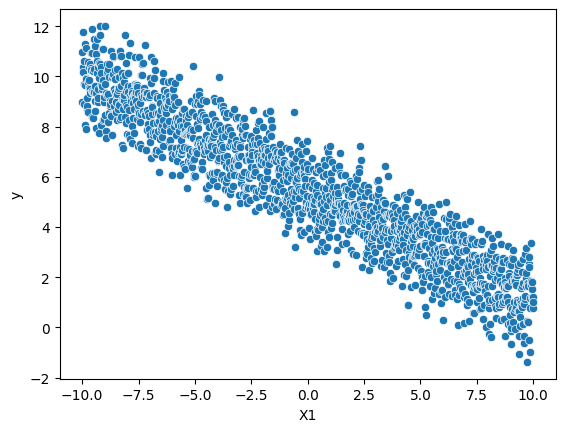

In [ ]:
### Gráfico de dispersión

sns.scatterplot(data = data, x = 'X1', y = 'y')
plt.show()

In [ ]:
!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 72.8 MB/s eta 0:00:00


In [ ]:
modelo = gp.Model('Regresión Lineal Simple')

### Variables de decisión

m = modelo.addVar(1, vtype = GRB.CONTINUOUS, name = 'Pendiente')
b = modelo.addVar(1, vtype = GRB.CONTINUOUS, name = 'Intercepto')

### Función objetivo

n = data.shape[0]

modelo.setObjective(sum((data.iloc[i,4] - (m*data.iloc[i,1] + b) )**2 for i in range(n)), GRB.MINIMIZE)

modelo.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x0ebc5117
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+04, 4e+04]
  QObjective range [1e-12, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 2 columns
Presolve time: 0.02s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective 1.06455644e+05


In [ ]:
for i in modelo.getVars():
  print(i.VarName,i.x)

Pendiente 1.0
Intercepto 5.4881952263193305


In [ ]:
### Con SKlearn

from sklearn.linear_model import LinearRegression

modelo_rls = LinearRegression()
modelo_rls.fit(data[['X1']], data[['y']])

LinearRegression()

In [ ]:
print('Coeficientes:',modelo.coef_)
print('Intercepto:', modelo.intercept_)

preds_manual = data['X1']*modelo.coef_[0][0] + modelo.intercept_[0]

preds_sklearn = modelo.predict(data[['X1']])


Coeficientes: [[-0.4478604]]
Intercepto: [5.48819523]


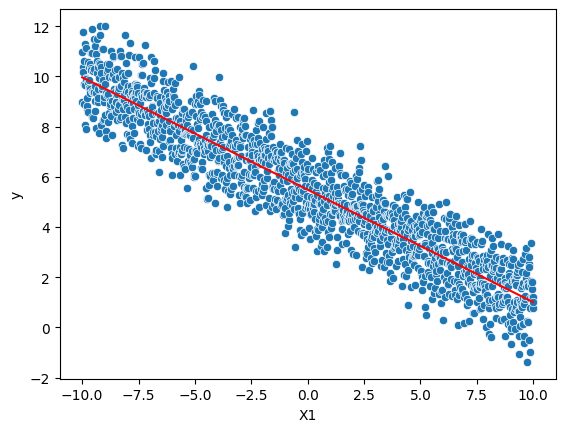

In [ ]:
sns.scatterplot(data = data, x = 'X1', y = 'y')
sns.lineplot(x = data['X1'], y = preds_sklearn[:,0], color = 'red')
plt.show()

In [ ]:
### Interpretación

valor = np.array([0]).reshape(1, -1)
valor_dos = np.array([1]).reshape(1, -1)
print(modelo.predict(valor))
print(modelo.predict(valor_dos))

[[5.48819523]]
[[5.04033483]]


In [ ]:
### Modelo de regresión múltiple

modelo = LinearRegression()
modelo.fit(data[['X1','X2','X3']], data[['y']])

LinearRegression()

In [ ]:
print(modelo.coef_)
print(modelo.intercept_)

[[ 5.65604627e+12 -5.28000505e+12  6.07837154e+11]]
[5.95996484e+13]


In [ ]:
preds = modelo.predict(data[['X1','X2','X3']])
preds

array([[9.9453125],
       [9.921875 ],
       [9.9375   ],
       ...,
       [1.0390625],
       [1.0625   ],
       [1.03125  ]])

<Axes: xlabel='X1', ylabel='y'>

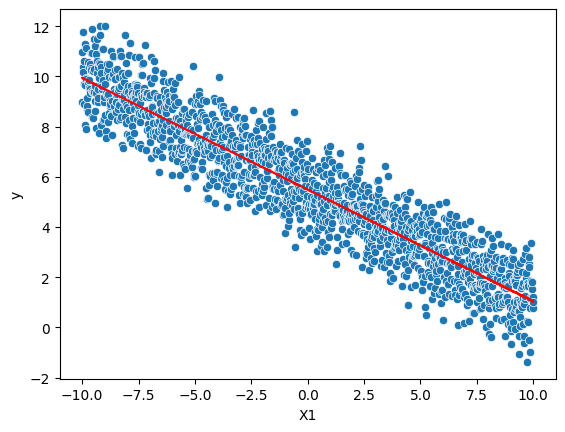

In [ ]:
sns.scatterplot(data = data, x = 'X1', y = 'y')
sns.lineplot(x = data['X1'], y = preds[:,0], color = 'red')

In [ ]:
### Split de los datos

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['X1','X2','X3']], data[['y']], test_size = 0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)

(1200, 3)
(300, 3)


In [ ]:
### Entrenar modelos

modelo_rls = LinearRegression()
modelo_rlm = LinearRegression()

modelo_rls.fit(x_train[['X1']], y_train)
modelo_rlm.fit(x_train[['X2']], y_train)

LinearRegression()

In [ ]:
### Predicciones

preds_modelo_rls = modelo_rls.predict(x_test[['X1']])
preds_modelo_rlm = modelo_rlm.predict(x_test[['X2']])

In [ ]:
### Métricas

### Manual

mse_manual_rls = np.mean((y_test - preds_modelo_rls)**2).values
mse_manual_rlm = np.mean((y_test - preds_modelo_rlm)**2).values

print('MSE Regresión Lineal Simple:', mse_manual_rls)
print('MSE Regresión Lineal Múltiple:', mse_manual_rlm)


### Sklearn

from sklearn.metrics import mean_squared_error

mse_rls = mean_squared_error(y_test, preds_modelo_rls)
mse_rlm = mean_squared_error(y_test, preds_modelo_rlm)
print(mse_rls)
print(mse_rlm)

MSE Regresión Lineal Simple: [1.04879341]
MSE Regresión Lineal Múltiple: [1.04879341]
1.0487934139779482
1.0487934139779482


## Data real

In [ ]:
data = pd.read_csv('real_estate.csv')

x = data[['area',' bedrooms',' bathrooms']]
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

## Entrenamiento

modelo_1 = LinearRegression()
modelo_1.fit(x_train[['area']], y_train)

modelo_2 = LinearRegression()
modelo_2.fit(x_train[[' bedrooms']], y_train)

modelo_3 = LinearRegression()
modelo_3.fit(x_train[['area',' bedrooms']], y_train)


LinearRegression()

In [ ]:
print(modelo_3.coef_)
print(modelo_3.intercept_)


[[5.97385513e-02 1.07370917e+02]]
[176.57588117]


In [ ]:
### R2

from sklearn.metrics import r2_score

preds_1 = modelo_1.predict(x_test[['area']])
preds_2 = modelo_2.predict(x_test[[' bedrooms']])
preds_3 = modelo_3.predict(x_test[['area',' bedrooms']])

mse_1 = mean_squared_error(y_test, preds_1)
mse_2 = mean_squared_error(y_test, preds_2)
mse_3 = mean_squared_error(y_test, preds_3)

r2_1 = r2_score(y_test, preds_1)
r2_2 = r2_score(y_test, preds_2)
r2_3 = r2_score(y_test, preds_3)


print(mse_1)
print(mse_2)
print(mse_3)

print(r2_1)
print(r2_2)
print(r2_3)

22106.91009279086
37660.218829466845
30876.29498941076
-1.04376782875257
-2.4816599581026875
-1.8544911118542209


In [ ]:
### Analizando el mejor modelo

print(modelo_1.coef_)
print(modelo_1.intercept_)

[[0.15110569]]
[331.96983368]


<Axes: xlabel='area', ylabel='price'>

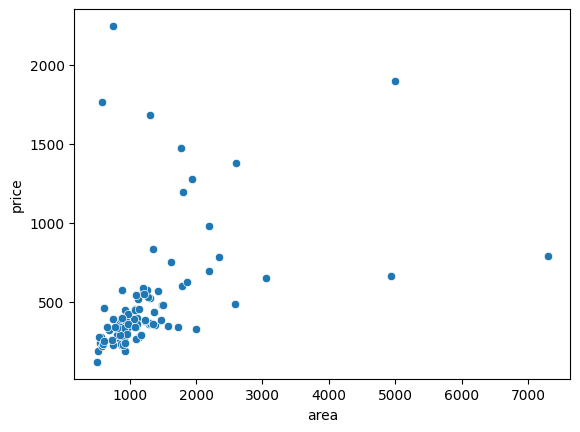

In [ ]:
sns.scatterplot(data = data, x = 'area', y = 'price')

In [ ]:
### Supuestos de la regresión lineal

## 1. Multicolinealidad
## 2. Homocedasticidad
## 3. Normalidad de los residuos
